# Aggregate all of the Previous DataSets

In [67]:
import pandas as pd
import numpy as np
import plotnine as p9
from plotnine import ggplot, aes, facet_grid, labs, geom_point, geom_smooth, coord_flip, scale_color_manual
from sklearn.linear_model import LinearRegression as lm
import statsmodels.tools.tools as sm
from statsmodels.discrete.discrete_model import Probit
from statsmodels.discrete.discrete_model import Logit
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None, "display.max_columns", None)

Pull together all of the datasets cleaned

In [4]:
#awaiting Cook release of 2002 datapoints
#df108 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_108.csv")
df109 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_109.csv")
df110 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_110.csv")
df111 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_111.csv")
df112 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_112.csv")
df113 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_113.csv")
df114 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_114.csv")
df115 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_115.csv")
df116 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_116.csv")
df117 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_117.csv")

Concatonate and Touch Up

In [5]:
df = pd.concat([df109,df110,df111,df112,df113,df114,df115,df116,df117])
df["PVI"] = df["PVI"].str.replace("D+0","R+0")

Put into CSV for Later Use

In [6]:
df.to_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/processed/aggregated_districts.csv", index = False)

## Begin Analysis of PVI

### Analysis 1: Averaging

In [56]:
#group by metric and average GOP seats
bm = df.groupby('metric').mean()
#this will not be produced into a dataset without aggregating all years, as 
bm = bm.sort_values('metric')
bm = bm.reset_index()

### Analysis 2: Probit

In [57]:
#set input of GOP to a probit friendly format
df.is_GOP = df.is_GOP == 1
#define variables
Y = df.is_GOP
X = df.metric
model = Probit(Y, sm.add_constant(X).astype(float))
prob_mod = model.fit()
pred_Y = prob_mod.predict(sm.add_constant(X))
prob_mod.summary()

Optimization terminated successfully.
         Current function value: 0.250068
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                 is_GOP   No. Observations:                 3915
Model:                         Probit   Df Residuals:                     3913
Method:                           MLE   Df Model:                            1
Date:                Tue, 01 Mar 2022   Pseudo R-squ.:                  0.6392
Time:                        10:57:01   Log-Likelihood:                -979.02
converged:                       True   LL-Null:                       -2713.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3669      0.257    -32.551      0.000      -8.871      -7.863
metric        16.3746      0.487     33.642      0.000      15.421      17.329
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

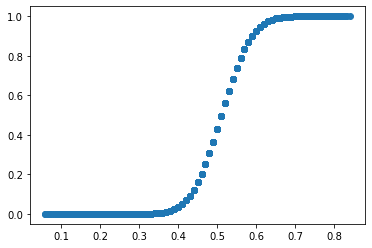

In [58]:
plt.scatter(X,pred_Y)

In [59]:
results = pd.concat([X,pred_Y], axis = 1)
#group by metric and average GOP seats
bm_probit = results.groupby('metric').mean()
#this will not be produced into a dataset without aggregating all years, as 
bm_probit = bm_probit.sort_values('metric')
bm_probit = bm_probit.reset_index()
bm_probit[0] = bm_probit[0].round(2)

### Logit

### Compare

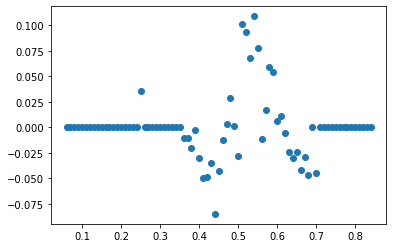

In [66]:
compare = bm.merge(bm_probit,on="metric")
compare.diff = compare["is_GOP"] - compare[0]
plt.scatter(compare.metric,compare.diff)

In [11]:
binned = df
binned["bin"] = pd.cut(binned['metric'], 
    bins = [0, .24, .42, .44, .45, .46, .47, .48, .49, .5,
    .51, .52, .53, .54, .57, .7, 1], labels =
    ["D+26+","D+25 to D+8","D+7 to D+6","D+5","D+4","D+3","D+2","D+1",
    "EVEN","R+1","R+2","R+3","R+4","R+5 to R+7","R+8 to R+20","R+21+"])
binned = binned.sort_values(by="metric")